In [1]:
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd
import os
import json
import numpy as np
from collections import defaultdict
from IPython.display import display, HTML
from collections import defaultdict

from matplotlib import colors as mcolors
from matplotlib import cm
from mycolorpy import colorlist as mcp
from sklearn.metrics.pairwise import cosine_similarity
from itertools import combinations

In [2]:
dirs = [
        "/home/noah/ESSL/experiments/ssl_testing3/BYOL",
        "/home/noah/ESSL/experiments/ssl_testing3/NNCLR",
        "/home/noah/ESSL/experiments/ssl_testing3/SimCLR",
        "/home/noah/ESSL/experiments/ssl_testing3/SwaV"
]


# vals = pd.read_csv(os.path.join(dirs[0], "outcomes.csv"))
vals = pd.DataFrame(columns=pd.read_csv(os.path.join(dirs[0], "outcomes.csv")).columns)
for d in dirs:
    f = os.path.join(d, "outcomes.csv")
    f = pd.read_csv(f)
    f["method"] = [os.path.basename(d) for _ in range(len(f))]
    vals = pd.concat([vals, f])


with open(os.path.join(dirs[0], "chromosomes.json"), "r") as f:
    chromos = json.load(f)
c_strings = []
ops = []
for i in range(len(chromos)):
    c = chromos[str(i)]
    c = [c_i[0] for c_i in c]
    c_strings.append(" ".join(c))
    ops.append(c)
chromo_df = pd.DataFrame(ops, columns=["op1", "op2", "op3"])
colors=mcp.gen_color(cmap='Paired',n=len(c_strings))
chromo_colors = {chromo:color for chromo, color in zip(c_strings, colors)}
chromo_df["chromosome"] = c_strings
chromos = {}
for method in vals["method"].unique():
    vals_i = vals[vals["method"] == method]
    chromo_df_i = pd.concat([chromo_df, vals_i], axis=1)
    chromo_df_i = chromo_df_i.drop(columns=["Unnamed: 0"])
    chromos[method] = chromo_df_i


In [23]:
chromos

{'BYOL':             op1         op2         op3                       chromosome  \
 0    Brightness      ShearX    Solarize       Brightness ShearX Solarize   
 1      Contrast      Rotate  TranslateX       Contrast Rotate TranslateX   
 2        ShearY  TranslateY       Color          ShearY TranslateY Color   
 3         Color    Solarize   Sharpness         Color Solarize Sharpness   
 4        Rotate       Color  TranslateX          Rotate Color TranslateX   
 ..          ...         ...         ...                              ...   
 240  TranslateY      ShearX   Sharpness      TranslateY ShearX Sharpness   
 241      Rotate    Contrast       Color            Rotate Contrast Color   
 242   Sharpness  TranslateX       Color       Sharpness TranslateX Color   
 243    Solarize  Brightness    Contrast     Solarize Brightness Contrast   
 244   Sharpness  TranslateX  Brightness  Sharpness TranslateX Brightness   
 
     chromosome final ssl loss final train loss final val loss fin

Exploring test acc top k operators

In [3]:
all_ops = set(list(chromos['BYOL']["op1"].unique())+ list(chromos['BYOL']["op2"].unique()) + list(chromos['BYOL']["op3"].unique()))
for op in all_ops:
    print(op)


TranslateX
Brightness
Contrast
Solarize
Sharpness
Rotate
TranslateY
ShearX
Color
ShearY


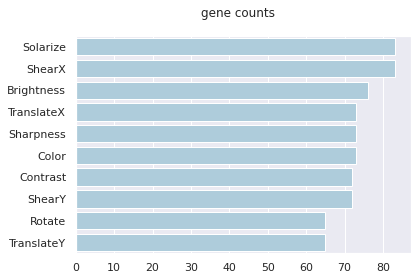

['#a6cee3',
 '#a6cee3',
 '#a6cee3',
 '#a6cee3',
 '#a6cee3',
 '#a6cee3',
 '#a6cee3',
 '#a6cee3',
 '#a6cee3',
 '#a6cee3']

<Figure size 432x288 with 0 Axes>

In [4]:
sns.set_theme()
chromos_i = chromos["BYOL"]
counts = []
both = []
normalize = {}
for i, op in enumerate(all_ops):
    c = (chromos_i["op1"] == op).sum() + (chromos_i["op2"] == op).sum() + (chromos_i["op3"] == op).sum()
    counts.append(c)
    both.append([op, c, colors[i]])
    normalize[op] = c
both.sort(key=lambda x: x[1], reverse=True)

sns.barplot(x=[i[1] for i in both], y=[i[0] for i in both], palette=[i[2] for i in both])
plt.suptitle(f"gene counts")
plt.show()
plt.clf()
[i[2] for i in both]

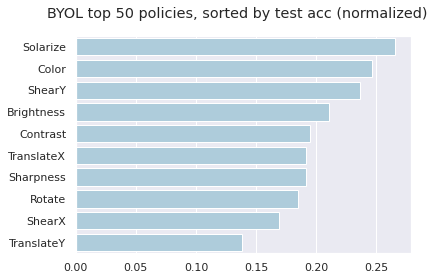

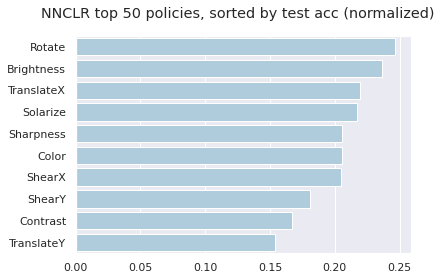

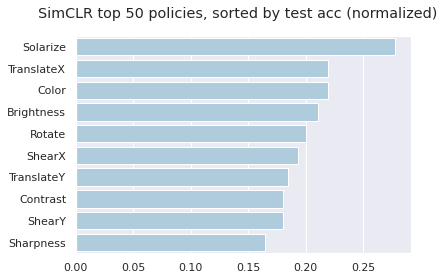

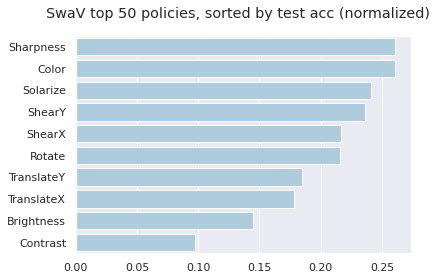

<Figure size 432x288 with 0 Axes>

In [5]:
sns.set_theme()
N = 50
for method in chromos:
    chromos_i = chromos[method]
    chromos_i = chromos_i.sort_values(by="test acc")
    counts = []
    both = []
    for i, op in enumerate(all_ops):
        c = (chromos_i["op1"] == op)[:N].sum() + (chromos_i["op2"] == op)[:N].sum() + (chromos_i["op3"] == op)[:N].sum()
        counts.append(c / normalize[op]) 
        both.append([op, c / normalize[op], colors[i]])
    both.sort(key=lambda x: x[1], reverse=True)
    
    sns.barplot(x=[i[1] for i in both], y=[i[0] for i in both], palette=[i[2] for i in both])
    plt.suptitle(f"{method} top {N} policies, sorted by test acc (normalized)")
    plt.show()
    plt.clf()
    

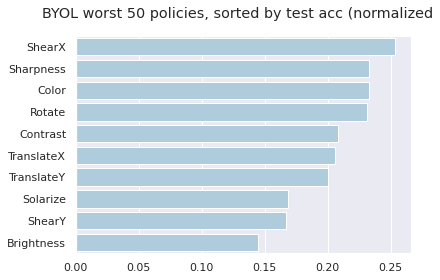

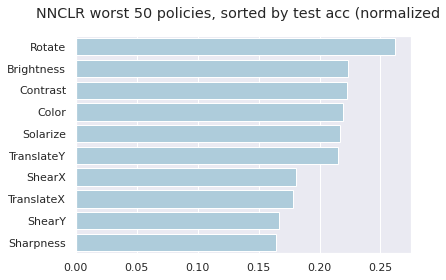

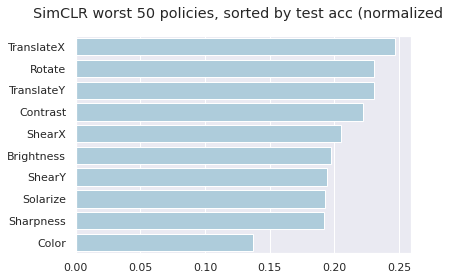

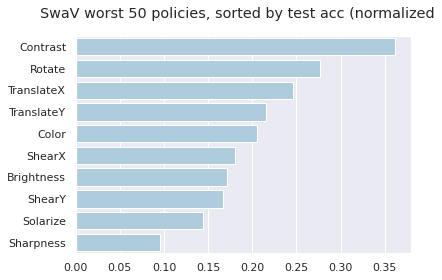

['#a6cee3',
 '#a6cee3',
 '#a6cee3',
 '#a6cee3',
 '#a6cee3',
 '#a6cee3',
 '#a6cee3',
 '#a6cee3',
 '#a6cee3',
 '#a6cee3']

<Figure size 432x288 with 0 Axes>

In [6]:
sns.set_theme()
N = 50
for method in chromos:
    chromos_i = chromos[method]
    chromos_i = chromos_i.sort_values(by="test acc")
    counts = []
    both = []
    for i, op in enumerate(all_ops):
        c = (chromos_i["op1"] == op)[-N:].sum() + (chromos_i["op2"] == op)[-N:].sum() + (chromos_i["op3"] == op)[-N:].sum()
        counts.append( c / normalize[op])
        both.append([op,  c / normalize[op], colors[i]])
    both.sort(key=lambda x: x[1], reverse=True)
    
    sns.barplot(x=[i[1] for i in both], y=[i[0] for i in both], palette=[i[2] for i in both])
    plt.suptitle(f"{method} worst {N} policies, sorted by test acc (normalized")
    plt.show()
    plt.clf()
[i[2] for i in both]

The strange thing about this is solarize also shows up in the worst chromosomes...

Lets see overall counts

We see that solarize is the most common gene, but also the same amount of shearX is present, and this seems to not effect the outcome of the performances. 

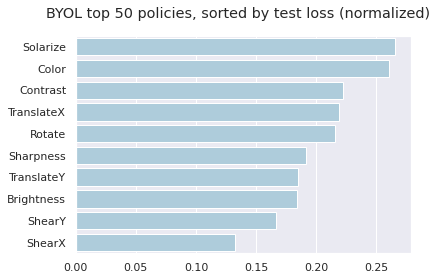

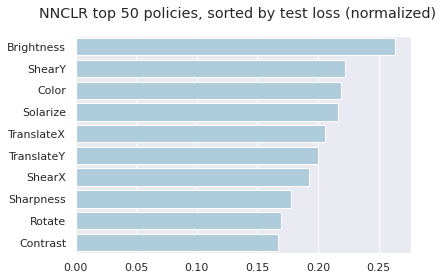

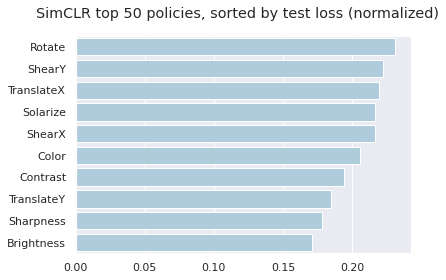

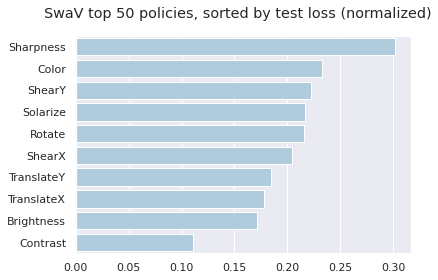

<Figure size 432x288 with 0 Axes>

In [7]:
sns.set_theme()
N = 50
for method in chromos:
    chromos_i = chromos[method]
    chromos_i = chromos_i.sort_values(by="final test loss", ascending=False)
    counts = []
    both = []
    for i, op in enumerate(all_ops):
        c = (chromos_i["op1"] == op)[:N].sum() + (chromos_i["op2"] == op)[:N].sum() + (chromos_i["op3"] == op)[:N].sum()
        counts.append( c / normalize[op])
        both.append([op,  c / normalize[op], colors[i]])
    both.sort(key=lambda x: x[1], reverse=True)
    
    sns.barplot(x=[i[1] for i in both], y=[i[0] for i in both], palette=[i[2] for i in both])
    plt.suptitle(f"{method} top {N} policies, sorted by test loss (normalized)")
    plt.show()
    plt.clf()

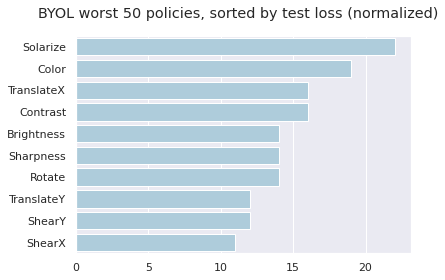

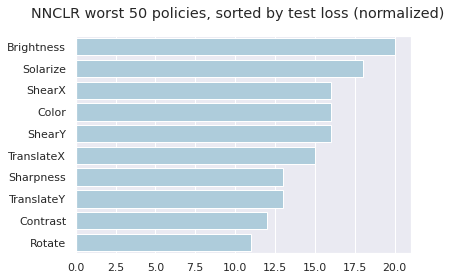

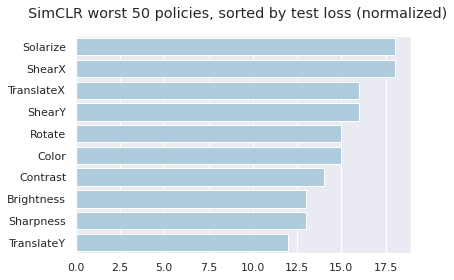

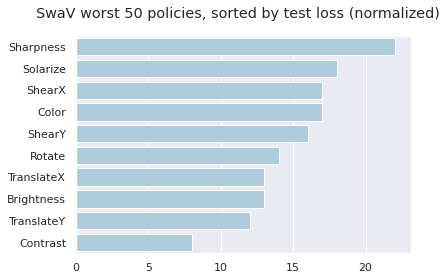

<Figure size 432x288 with 0 Axes>

In [8]:
sns.set_theme()
N = 50
for method in chromos:
    chromos_i = chromos[method]
    chromos_i = chromos_i.sort_values(by="final test loss")
    counts = []
    both = []
    for i, op in enumerate(all_ops):
        c = (chromos_i["op1"] == op)[-N:].sum() + (chromos_i["op2"] == op)[-N:].sum() + (chromos_i["op3"] == op)[-N:].sum()
        counts.append(c)
        both.append([op, c, colors[i]])
    both.sort(key=lambda x: x[1], reverse=True)
    
    sns.barplot(x=[i[1] for i in both], y=[i[0] for i in both], palette=[i[2] for i in both])
    plt.suptitle(f"{method} worst {N} policies, sorted by test loss (normalized)")
    plt.show()
    plt.clf()
    

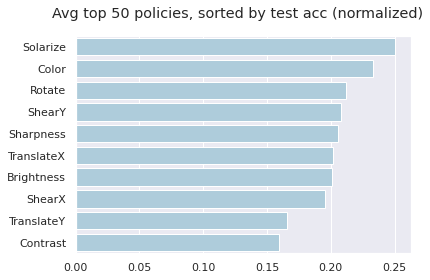

<Figure size 432x288 with 0 Axes>

In [9]:
# average of all four

sns.set_theme()
N = 50
counts = []
both = defaultdict(list)
for method in chromos:
    chromos_i = chromos[method]
    chromos_i = chromos_i.sort_values(by="test acc")
    
    for i, op in enumerate(all_ops):
        c = (chromos_i["op1"] == op)[:N].sum() + (chromos_i["op2"] == op)[:N].sum() + (chromos_i["op3"] == op)[:N].sum()
        counts.append(c / normalize[op]) 
        both[op].append(c / normalize[op])
        
        
both = [[op, sum(both[op])/len(both[op]), colors[i]] for i, op in enumerate(all_ops)]        
# both = [[j[0], sum(j[1])/len(j[1])] for j in both]
both.sort(key=lambda x: x[1], reverse=True)
sns.barplot(x=[i[1] for i in both], y=[i[0] for i in both], palette=[i[2] for i in both])
plt.suptitle(f"Avg top {N} policies, sorted by test acc (normalized)")
plt.show()
plt.clf()

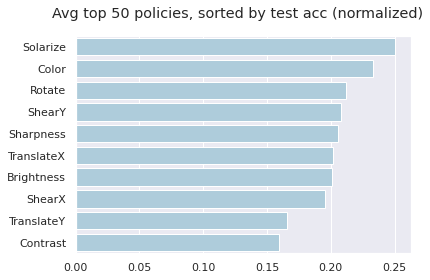

<Figure size 432x288 with 0 Axes>

In [10]:
# average of all four

sns.set_theme()
N = 50
counts = []
both = defaultdict(list)
for method in chromos:
    chromos_i = chromos[method]
    chromos_i = chromos_i.sort_values(by="test acc")
    
    for i, op in enumerate(all_ops):
        c = (chromos_i["op1"] == op)[:N].sum() + (chromos_i["op2"] == op)[:N].sum() + (chromos_i["op3"] == op)[:N].sum()
        counts.append(c / normalize[op]) 
        both[op].append(c / normalize[op])
        
        
both = [[op, sum(both[op])/len(both[op]), colors[i]] for i, op in enumerate(all_ops)]        
# both = [[j[0], sum(j[1])/len(j[1])] for j in both]
both.sort(key=lambda x: x[1], reverse=True)
sns.barplot(x=[i[1] for i in both], y=[i[0] for i in both], palette=[i[2] for i in both])
plt.suptitle(f"Avg top {N} policies, sorted by test acc (normalized)")
plt.show()
plt.clf()

In [11]:
# average of all four



Visualizing the chromosomes as a table

In [12]:
colors=mcp.gen_color(cmap='Paired',n=len(all_ops))
chromo_colors = {op:color for op, color in zip(all_ops, colors)}

In [13]:
chromo_df

,op1,op2,op3,chromosome
0,Brightness,ShearX,Solarize,Brightness ShearX Solarize
1,Contrast,Rotate,TranslateX,Contrast Rotate TranslateX
2,ShearY,TranslateY,Color,ShearY TranslateY Color
3,Color,Solarize,Sharpness,Color Solarize Sharpness
4,Rotate,Color,TranslateX,Rotate Color TranslateX
...,...,...,...,...
240,TranslateY,ShearX,Sharpness,TranslateY ShearX Sharpness
241,Rotate,Contrast,Color,Rotate Contrast Color
242,Sharpness,TranslateX,Color,Sharpness TranslateX Color
243,Solarize,Brightness,Contrast,Solarize Brightness Contrast


In [14]:
def colorchromos(val):
    return [f'Background: {chromo_colors[val["op1"]]}', 
            f'Background: {chromo_colors[val["op2"]]}', 
            f'Background: {chromo_colors[val["op3"]]}',
           f'Background: white',
            f'Background: white']

for method in chromos:
    chromo_df = chromos[method]
    chromo_df = chromo_df.sort_values(by="test acc", ascending=True)
    print(method)
    display(HTML(chromo_df[[
                            "op1", 
                            "op2",
                            "op3", 
                            "test acc",
                            "final test loss"]][:2].style.apply(colorchromos, axis=1).to_html()))

BYOL


,op1,op2,op3,test acc,final test loss
159,Rotate,TranslateX,Contrast,81.920000,0.531820
90,Color,Rotate,Sharpness,81.960000,0.525775


NNCLR


,op1,op2,op3,test acc,final test loss
163,ShearX,Solarize,Color,80.530000,0.567656
74,Solarize,TranslateX,ShearX,80.760000,0.571672


SimCLR


,op1,op2,op3,test acc,final test loss
132,Solarize,Brightness,TranslateX,80.520000,0.579959
111,Contrast,Color,Solarize,81.010000,0.575584


SwaV


,op1,op2,op3,test acc,final test loss
237,TranslateY,Solarize,Sharpness,80.930000,0.568257
143,Rotate,ShearY,Color,81.130000,0.546526


In [15]:
for method in chromos:
    chromo_df = chromos[method]
    chromo_df = chromo_df.sort_values(by="final test loss", ascending=False)
    print(method)
    display(HTML(chromo_df[[
                            "op1", 
                            "op2",
                            "op3", 
                            "test acc",
                            "final test loss"]][:2].style.apply(colorchromos, axis=1).to_html()))

BYOL


,op1,op2,op3,test acc,final test loss
146,Brightness,ShearY,TranslateX,82.040000,0.540177
94,ShearY,Solarize,Brightness,82.000000,0.535948


NNCLR


,op1,op2,op3,test acc,final test loss
74,Solarize,TranslateX,ShearX,80.760000,0.571672
163,ShearX,Solarize,Color,80.530000,0.567656


SimCLR


,op1,op2,op3,test acc,final test loss
132,Solarize,Brightness,TranslateX,80.520000,0.579959
111,Contrast,Color,Solarize,81.010000,0.575584


SwaV


,op1,op2,op3,test acc,final test loss
90,Color,Rotate,Sharpness,81.210000,0.571783
237,TranslateY,Solarize,Sharpness,80.930000,0.568257


Operator sensitivity

In [16]:
# treating order as important
cols = ["op1", 
        "op2",
        "op3", ]
operator_importances = defaultdict(dict)
for method in chromos:
    chromo_df = chromos[method]
    total_similar_accs = {}
    total_similar_chromos = {}
    for op in all_ops:
        op_df = chromo_df[(chromo_df[cols]==op).any(axis="columns")]
        similar_accs = []
        similar_chromos = []
        for i, row_i in op_df.iterrows():
            p_i = row_i["test acc"]
            similar_chromos_i = [row_i["chromosome"].iloc[0]]
            if row_i["op1"] == op:
                operator = "op1"
            if row_i["op2"] == op:
                operator = "op2"
            if row_i["op3"] == op:
                operator = "op3"
            other_cols = list(set(cols) - set([operator]))
            avg = 0
            num = 0
            for k, row_k in chromo_df.iterrows():
                if i == k:
                    continue
                if (row_k[operator] != op and row_k[other_cols[0]] == row_i[other_cols[0]]) and (row_k[other_cols[1]] == row_i[other_cols[1]]):
                    avg+=row_k["test acc"]
                    num+=1
                    similar_chromos_i.append(row_k["chromosome"].iloc[0])
            if num == 0:
                continue
            similar_accs.append(abs(p_i - (avg/num)))
            similar_chromos.append(similar_chromos_i)
        total_similar_accs[op] = similar_accs
        total_similar_chromos[op] = similar_chromos
    operator_importances[method]["accs"] = total_similar_accs
    operator_importances[method]["chromos"] = total_similar_chromos
            


In [17]:
chromo_df

,op1,op2,op3,chromosome,chromosome,final ssl loss,final train loss,final val loss,final test loss,test acc,train acc,val acc,method
0,Brightness,ShearX,Solarize,Brightness ShearX Solarize,0,4.714226,0.538625,0.609014,0.555311,81.46,81.546667,78.86,SwaV
1,Contrast,Rotate,TranslateX,Contrast Rotate TranslateX,1,4.724234,0.527112,0.588472,0.524555,82.4,81.875556,80.04,SwaV
2,ShearY,TranslateY,Color,ShearY TranslateY Color,2,5.824056,0.525273,0.598444,0.525934,82.32,82.004444,79.34,SwaV
3,Color,Solarize,Sharpness,Color Solarize Sharpness,3,4.647628,0.514009,0.579832,0.521363,82.63,82.46,79.46,SwaV
4,Rotate,Color,TranslateX,Rotate Color TranslateX,4,4.709378,0.522326,0.575464,0.501576,83.22,82.233333,79.92,SwaV
...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,TranslateY,ShearX,Sharpness,TranslateY ShearX Sharpness,240,5.824429,0.529691,0.580961,0.506338,82.53,81.833333,79.62,SwaV
241,Rotate,Contrast,Color,Rotate Contrast Color,241,4.718337,0.529941,0.584079,0.530116,81.88,81.904444,79.94,SwaV
242,Sharpness,TranslateX,Color,Sharpness TranslateX Color,242,5.777626,0.52043,0.559005,0.518389,82.38,82.26,81.24,SwaV
243,Solarize,Brightness,Contrast,Solarize Brightness Contrast,243,4.985547,0.514911,0.558159,0.491146,83.27,82.597778,80.66,SwaV


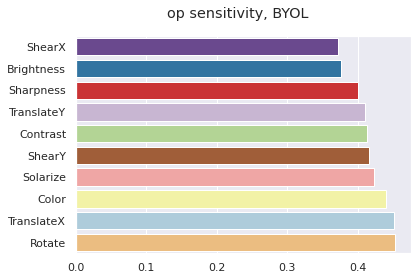

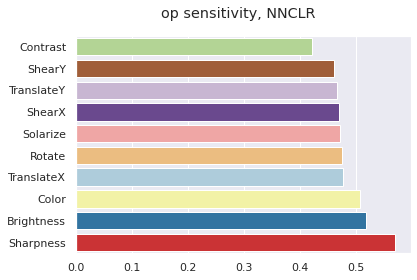

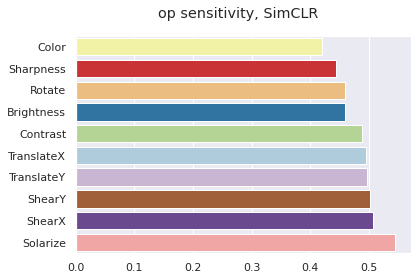

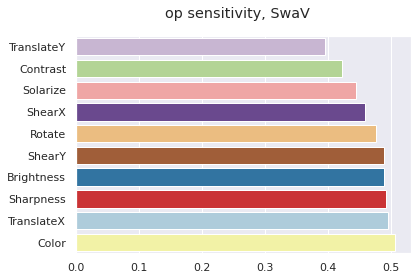

<Figure size 432x288 with 0 Axes>

In [18]:
for method in operator_importances:
    avg_accs = []
    avg_ops = []
    both = []
    missing = []
    total_similar_accs = operator_importances[method]["accs"]
    for i, op in enumerate(total_similar_accs):
        try:
            avg_accs.append(sum(total_similar_accs[op])/len(total_similar_accs[op]))
            avg_ops.append(op)
            both.append([op, sum(total_similar_accs[op])/len(total_similar_accs[op]), colors[i]])
        except:
            missing.append(op)
    both.sort(key=lambda x: x[1])
    avg_accs
    sns.barplot(y=[x[0] for x in both], x=[x[1] for x in both], palette=[i[2] for i in both])
    plt.suptitle(f"op sensitivity, {method}")
    plt.show()
    plt.clf()

In [19]:
# treating order as important
cols = ["op1", 
        "op2",
        "op3", ]
total_similar_accs = {}
total_similar_chromos = {}
for op in all_ops:
    op_df = chromo_df[(chromo_df[cols]==op).any(axis="columns")]
    similar_accs = []
    similar_chromos = []
    for i, row_i in op_df.iterrows():
        p_i = row_i["test acc"]
        similar_chromos_i = [row_i["chromosome"].iloc[0]]
        if row_i["op1"] == op:
            operator = "op1"
        if row_i["op2"] == op:
            operator = "op2"
        if row_i["op3"] == op:
            operator = "op3"
        other_cols = list(set(cols) - set([operator]))
        avg = 0
        num = 0
        for k, row_k in chromo_df.iterrows():
            if i == k:
                continue
            if (row_k[operator] != op and row_k[other_cols[0]] == row_i[other_cols[0]]) and (row_k[other_cols[1]] == row_i[other_cols[1]]):
                avg+=row_k["test acc"]
                num+=1
                similar_chromos_i.append(row_k["chromosome"].iloc[0])
        if num == 0:
            continue
        similar_accs.append(abs(p_i - (avg/num)))
        similar_chromos.append(similar_chromos_i)
    total_similar_accs[op] = similar_accs
    total_similar_chromos[op] = similar_chromos
            

In [20]:
# treating order as not important
cols = ["op1", 
        "op2",
        "op3", ]
total_similar_accs = {}
total_similar_chromos = {}
for op in all_ops:
    op_df = chromo_df[(chromo_df[cols]==op).any(axis="columns")]
    similar_accs = []
    similar_chromos = []
    for i, row_i in op_df.iterrows():
        p_i = row_i["test acc"]
        similar_chromos_i = [row_i["chromosome"].iloc[0]]
        if row_i["op1"] == op:
            operator = "op1"
        if row_i["op2"] == op:
            operator = "op2"
        if row_i["op3"] == op:
            operator = "op3"
        other_cols = list(set(cols) - set([operator]))
        avg = 0
        num = 0
        for k, row_k in chromo_df.iterrows():
            if i == k:
                continue
            if (operator not in list(row_k[["op1", "op2", "op3"]])) and (other_cols[0] in list(row_k[["op1", "op2", "op3"]])) and (other_cols[1] in list(row_k[["op1", "op2", "op3"]])):
                avg+=row_k["test acc"]
                num+=1
                similar_chromos_i.append(row_k["chromosome"].iloc[0])
        if num == 0:
            continue
        similar_accs.append(abs(p_i - (avg/num)))
        similar_chromos.append(similar_chromos_i)
    total_similar_accs[op] = similar_accs
    total_similar_chromos[op] = similar_chromos
            


In [21]:
total_similar_accs
# avg_accs = []
# avg_ops = []
# both = []
# missing = []
# for op in total_similar_accs:
#     try:
#         avg_accs.append(sum(total_similar_accs[op])/len(total_similar_accs[op]))
#         avg_ops.append(op)
#         both.append([op, sum(total_similar_accs[op])/len(total_similar_accs[op])])
#     except:
#         missing.append(op)
# both.sort(key=lambda x: x[1])
# avg_accs
# sns.barplot(y=[x[0] for x in both], x=[x[1] for x in both])
# plt.show()
# plt.clf()

{'TranslateX': [],
 'Brightness': [],
 'Contrast': [],
 'Solarize': [],
 'Sharpness': [],
 'Rotate': [],
 'TranslateY': [],
 'ShearX': [],
 'Color': [],
 'ShearY': []}

In [22]:
for method in chromos:
    chromos_i = chromos[method]
    chromos_i = chromos_i.sort_values(by="final test loss")